# Exploratory Analysis Green House Gas Emissions
## Case of Zambia
> Data Source: World Resources Institute Climate Analysis Indicators Tool

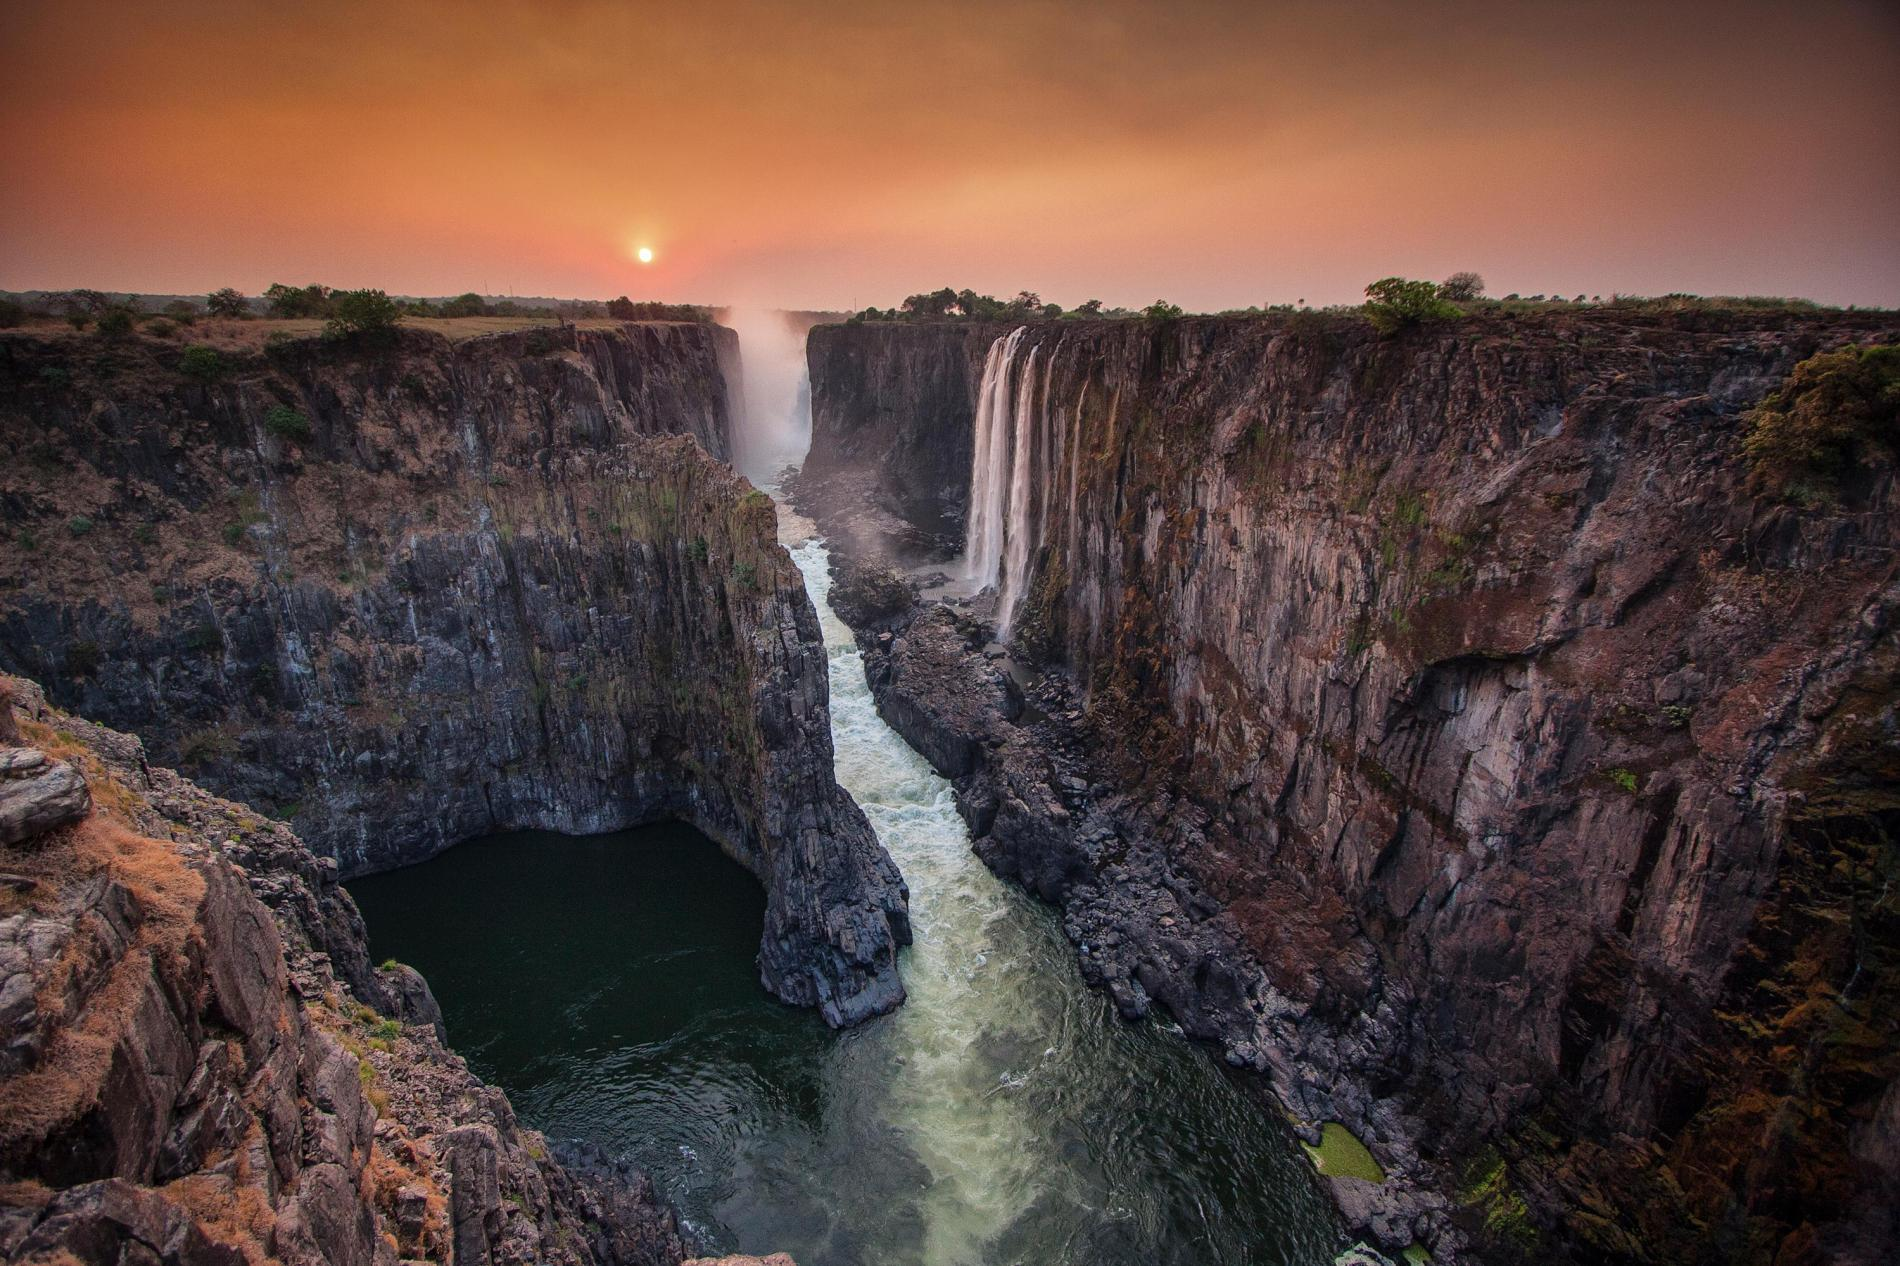

In [1]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(filename = '../data/zambia-travel.ngsversion.1503413472260.adapt.1900.1.jpg')

In [2]:
import pandas as pd
import numpy as np
from plotly import tools
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)

Here I'll load main dataset with Green House Gas emissions

In [3]:
df = pd.read_excel('../data/CW_CAIT_GHG_Emissions_31102017.xlsx', 
                   sheet_name='GHG Emissions')
df.columns = list(df.iloc[0].values)
df = df.drop('Country')
df_= df.reset_index()

/home/silas/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3108: PerformanceWarning:

dropping on a non-lexsorted multi-index without a level parameter may impact performance.



The data contains year (1990-2014), countries, and emission contributing sectors in megatons of C0<sub>2</sub>e.  The data has some nan values in it where no data collected for the year, but otherwise clean.

In [4]:
df_.head(3)

,level_0,level_1,Total GHG Emissions Excluding Land-Use Change and Forestry (MtCO2e),Total GHG Emissions Including Land-Use Change and Forestry (MtCO₂e‍),Total CO2 (excluding Land-Use Change and Forestry) (MtCO2),Total CH4 (MtCO2e),Total N2O (MtCO2e),Total F-Gas (MtCO2e),Total CO2 (including Land-Use Change and Forestry) (MtCO2),Total CH4 (including Land-Use Change and Forestry) (MtCO2e),...,Industrial Processes (MtCO2e),Agriculture (MtCO2e),Waste (MtCO2e),Land-Use Change and Forestry (MtCO2),Bunker Fuels (MtCO2),Electricity/Heat (MtCO2),Manufacturing/Construction (MtCO2),Transportation (MtCO2),Other Fuel Combustion (MtCO2e),Fugitive Emissions (MtCO2e)
0,Afghanistan,1990,15.2128,15.2128,2.91502,9.31159,2.98405,0.00218023,2.91502,9.31159,...,0.0571402,7.34271,4.03895,0,NaN,NaN,NaN,NaN,NaN,1.24222
1,Afghanistan,1991,15.2864,15.2864,2.68445,9.51619,3.08219,0.00361306,2.68445,9.51619,...,0.0585731,7.63103,4.22004,0,NaN,NaN,NaN,NaN,NaN,1.02085
2,Afghanistan,1992,14.0105,14.0105,1.39227,9.57148,3.04173,0.00504589,1.39227,9.57148,...,0.0636699,7.63144,4.40112,0,NaN,NaN,NaN,NaN,NaN,0.602588


Adding the continents to the dataset for further analysis by stripping from another dataset...

In [5]:
# extract continents for each country in target dataset 
df3 = pd.read_csv('../data/gapminderDataFiveYear.csv')[['country', 'continent']].drop_duplicates()
df_select = df_.rename(columns={'level_0':'country', 'level_1':'year'})
col_lst_select = ['country','year','Energy (MtCO2e)', 'Industrial Processes (MtCO2e)',
       'Agriculture (MtCO2e)', 'Waste (MtCO2e)',
       'Land-Use Change and Forestry (MtCO2)', 'Other Fuel Combustion (MtCO2e)',
       'Fugitive Emissions (MtCO2e)']

I want to clean up the column headers a bit for visual presentation and remove totals as we won't be needing those.

In [6]:
# merge continents with target dataset and clean up columns
df_all = df_select.loc[:,col_lst_select].merge(df3).set_index('continent').reset_index().rename(columns={'continent':'Continent','country':'Country','year':'Year'})
df_all.columns = list(df_all.columns.str.replace(' \(MtCO2e\)','').str.replace(' \(MtCO2\)', ''))

In [7]:
df_all.head(3)

,Continent,Country,Year,Energy,Industrial Processes,Agriculture,Waste,Land-Use Change and Forestry,Other Fuel Combustion,Fugitive Emissions
0,Asia,Afghanistan,1990,3.77404,0.0571402,7.34271,4.03895,0,NaN,1.24222
1,Asia,Afghanistan,1991,3.3768,0.0585731,7.63103,4.22004,0,NaN,1.02085
2,Asia,Afghanistan,1992,1.9143,0.0636699,7.63144,4.40112,0,NaN,0.602588


I'll save this merged dataset for further analysis.

In [8]:
# save target dataset to csv
df_all.to_csv('ghg.csv',index=False)

Now to drill down on GHGs related to Zambia, and comparing to its neighbors.

In [9]:
lst = ['Malawi', 'Zambia', 'Mozambique']
def select_countries(df,lst):
    df = df[df['Country'].isin(lst)]
    return df

In [10]:
df_select = select_countries(df_all,lst)
df_select_piv = df_select.pivot(index='Year', columns='Country', values= df_select.columns[3:])

In [11]:
def plot_country(country):
    data = []
    for i in list(df_select_piv.columns.get_level_values(0).unique()):
        data.append(go.Bar(
        x=df_select_piv.index,
        y=df_select_piv[i][country],
        name=i
        ))

    layout = go.Layout(
        barmode='stack',
        title=country+' GHG Emissions by Sector'
    )

    fig = go.Figure(data=data, layout=layout)
    
    return fig

In [12]:
country='Zambia'
fig1 = plot_country(country)
iplot(fig1, filename='pandas-bar-chart-layout '+country); 

Land use and forestry accounts for well over 65% of emissions for Zambia.  This could be a result of over use of this category or a doubling up between categories.   How does Zambia compare to its neighbors in this regard?

In [13]:
country='Mozambique'
fig1 = plot_country(country)
iplot(fig1, filename='pandas-bar-chart-layout '+country); 

Over half of emissions in Mozambique come from 'Land-Use Change and Forestry'. This category is potentially crowding out other factors. However, this does not appear relevant for Malawi.  

In [14]:
country='Malawi'
fig1 = plot_country(country)
iplot(fig1, filename='pandas-bar-chart-layout '+country); 

In addition to largest contributing sectors, tt would be good to compare total emissions over time.

In [15]:
# get total ghgs for 3 countries
df1 = df.reset_index()
df1 = df1[df1['level_0'].isin(['Malawi', 'Zambia', 'Mozambique']) ]
df1 = pd.DataFrame(df1.iloc[:,0:3])
df1.columns = ['Country', 'year', 'Emission Totals']
df1 = df1.pivot(index='year', columns='Country', values='Emission Totals').reset_index()

In [16]:
df1.head()

Country,year,Malawi,Mozambique,Zambia
0,1990,9.12266,18.2437,41.5585
1,1991,8.74378,18.1877,41.4408
2,1992,8.19758,18.4788,41.1258
3,1993,7.7916,18.8415,40.2397
4,1994,6.85482,18.766,39.1144


I'll extract population values from wb dataset in local dir. 
Then use: wget https://databank.worldbank.org/data/reports.aspx?source=2&series=SP.POP.TOTL&country=# 

In [17]:
def merge_pop_values(lst):
    
    for i,j in enumerate(lst):
        country=i
        file = 'pop.csv'
        df_pop = pd.read_csv('../data/'+ file)
        vals=df_pop[df_pop['Country Name']==j]
        values_=df_pop.loc[i].values[4:]
        len_=len(values_)
        columns_=[x+1990 for x in list(range(len_))]
        df1[j+'_pop'] = values_[:25]
        
    return df1 

df_m=merge_pop_values(lst)

In [18]:
df_m.head()

Country,year,Malawi,Mozambique,Zambia,Malawi_pop,Zambia_pop,Mozambique_pop
0,1990,9.12266,18.2437,41.5585,8.02725e+06,1.32476e+07,9.43755e+06
1,1991,8.74378,18.1877,41.4408,8.23973e+06,1.3592e+07,9.64115e+06
2,1992,8.19758,18.4788,41.1258,8.45228e+06,1.40712e+07,9.72972e+06
3,1993,7.7916,18.8415,40.2397,8.66917e+06,1.4637e+07,9.75586e+06
4,1994,6.85482,18.766,39.1144,8.89611e+06,1.5217e+07,9.79698e+06


Then calculate emissions on a total vs per capita basis.

In [19]:
for i in lst:
    df_m[i+'_MtCO2e_pc'] = df_m[i] / pd.to_numeric(df_m[i+'_pop'])

In [20]:
df_s=df_m.set_index('year').iloc[:,6:]

In [21]:
data = [go.Scatter(x=df_m.year, y=df_m[i], name=i) for i in list(df_m.columns)[1:4]]
layout = go.Layout(yaxis=dict(title='Total MtCO2e'), showlegend=True, title='Total GHG Emissions Excluding Land-Use Change and Forestry MtCO2e')
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='non-show-legend.html');

In [22]:
# per capita ghg

data = [go.Scatter(x=df_s.index, y=df_s[i], name=i) for i in list(df_s.columns)]
layout = go.Layout(yaxis=dict(title='Total MtCO2e'), showlegend=True, title='Total Per Capita GHG Emissions Excluding Land-Use Change and Forestry MtCO2e')
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='show-legend')